In [1]:
# importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import numpy as np
import string
from nltk import ngrams
from collections import defaultdict
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score

# this is defined to clean the data and preprocess it and developed by the team
from main_function import X_clean

# to filter all the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading the dataset into a df
df = pd.read_csv(r'C:\Users\Legion\Desktop\Disaster Detection System\train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# checking total rows and columns of the df
df.shape

(7613, 5)

In [5]:
# checking the not null values and the data type present across all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
# count of null values
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
# checking the unique values present for each column
df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [8]:
# dropping the id column since it is not required for the model
df.drop(columns='id', inplace = True)

In [9]:
# checking columns present in the df
df.columns

Index(['keyword', 'location', 'text', 'target'], dtype='object')

### Target Variable

In [10]:
# checking the target variable
df['target'].unique()

array([1, 0], dtype=int64)

In [11]:
df_target = df['target']

In [12]:
df_target.shape

(7613,)

In [13]:
df_target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Exploratory Data Analysis (EDA)

In [14]:
for col in ['keyword', 'location']:
    df[col] = df[col].fillna(f'no {col}')

In [15]:
df.isna().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

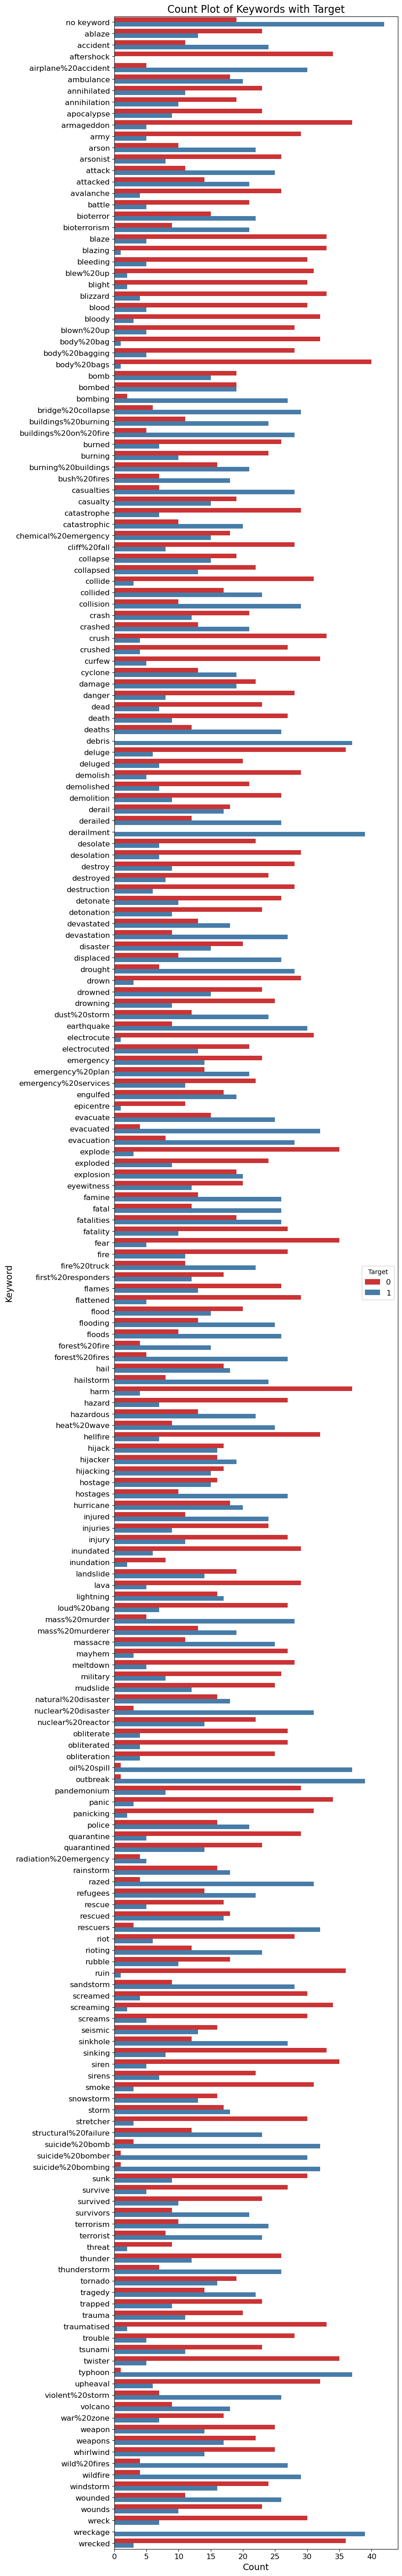

In [16]:
# count plot along y axis

# Define a figure size for plotting
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y ='keyword', hue = "target", data = df,palette = "Set1")

# Add title and labels
plt.title('Count Plot of Keywords with Target', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Target', fontsize=12)

# Show the plot
plt.show()

In [17]:
# Now we are adding columns into our dataset to get more insights from the data
# We are adding Word Count columns to get the count of words in each tweet
# We are adding Unique Word Count columns to get the count of unique words in each tweet
# We are adding Stop Word Count columns to get the count of stop words in each tweet
# We are adding URL Count columns to get the count of URL's in each tweet
# We are adding Mean Word Length columns to get the mean word length in each tweet
# We are adding Char Count columns to get the count of characters in each tweet
# We are adding Punctuation Count columns to get the count of punctuation in each tweet
# We are adding Hashtag Count columns to get the count of hashtags in each tweet
# We are adding Mention Count columns to get the count of mentions in each tweet


# word_count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# punctuation_count
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

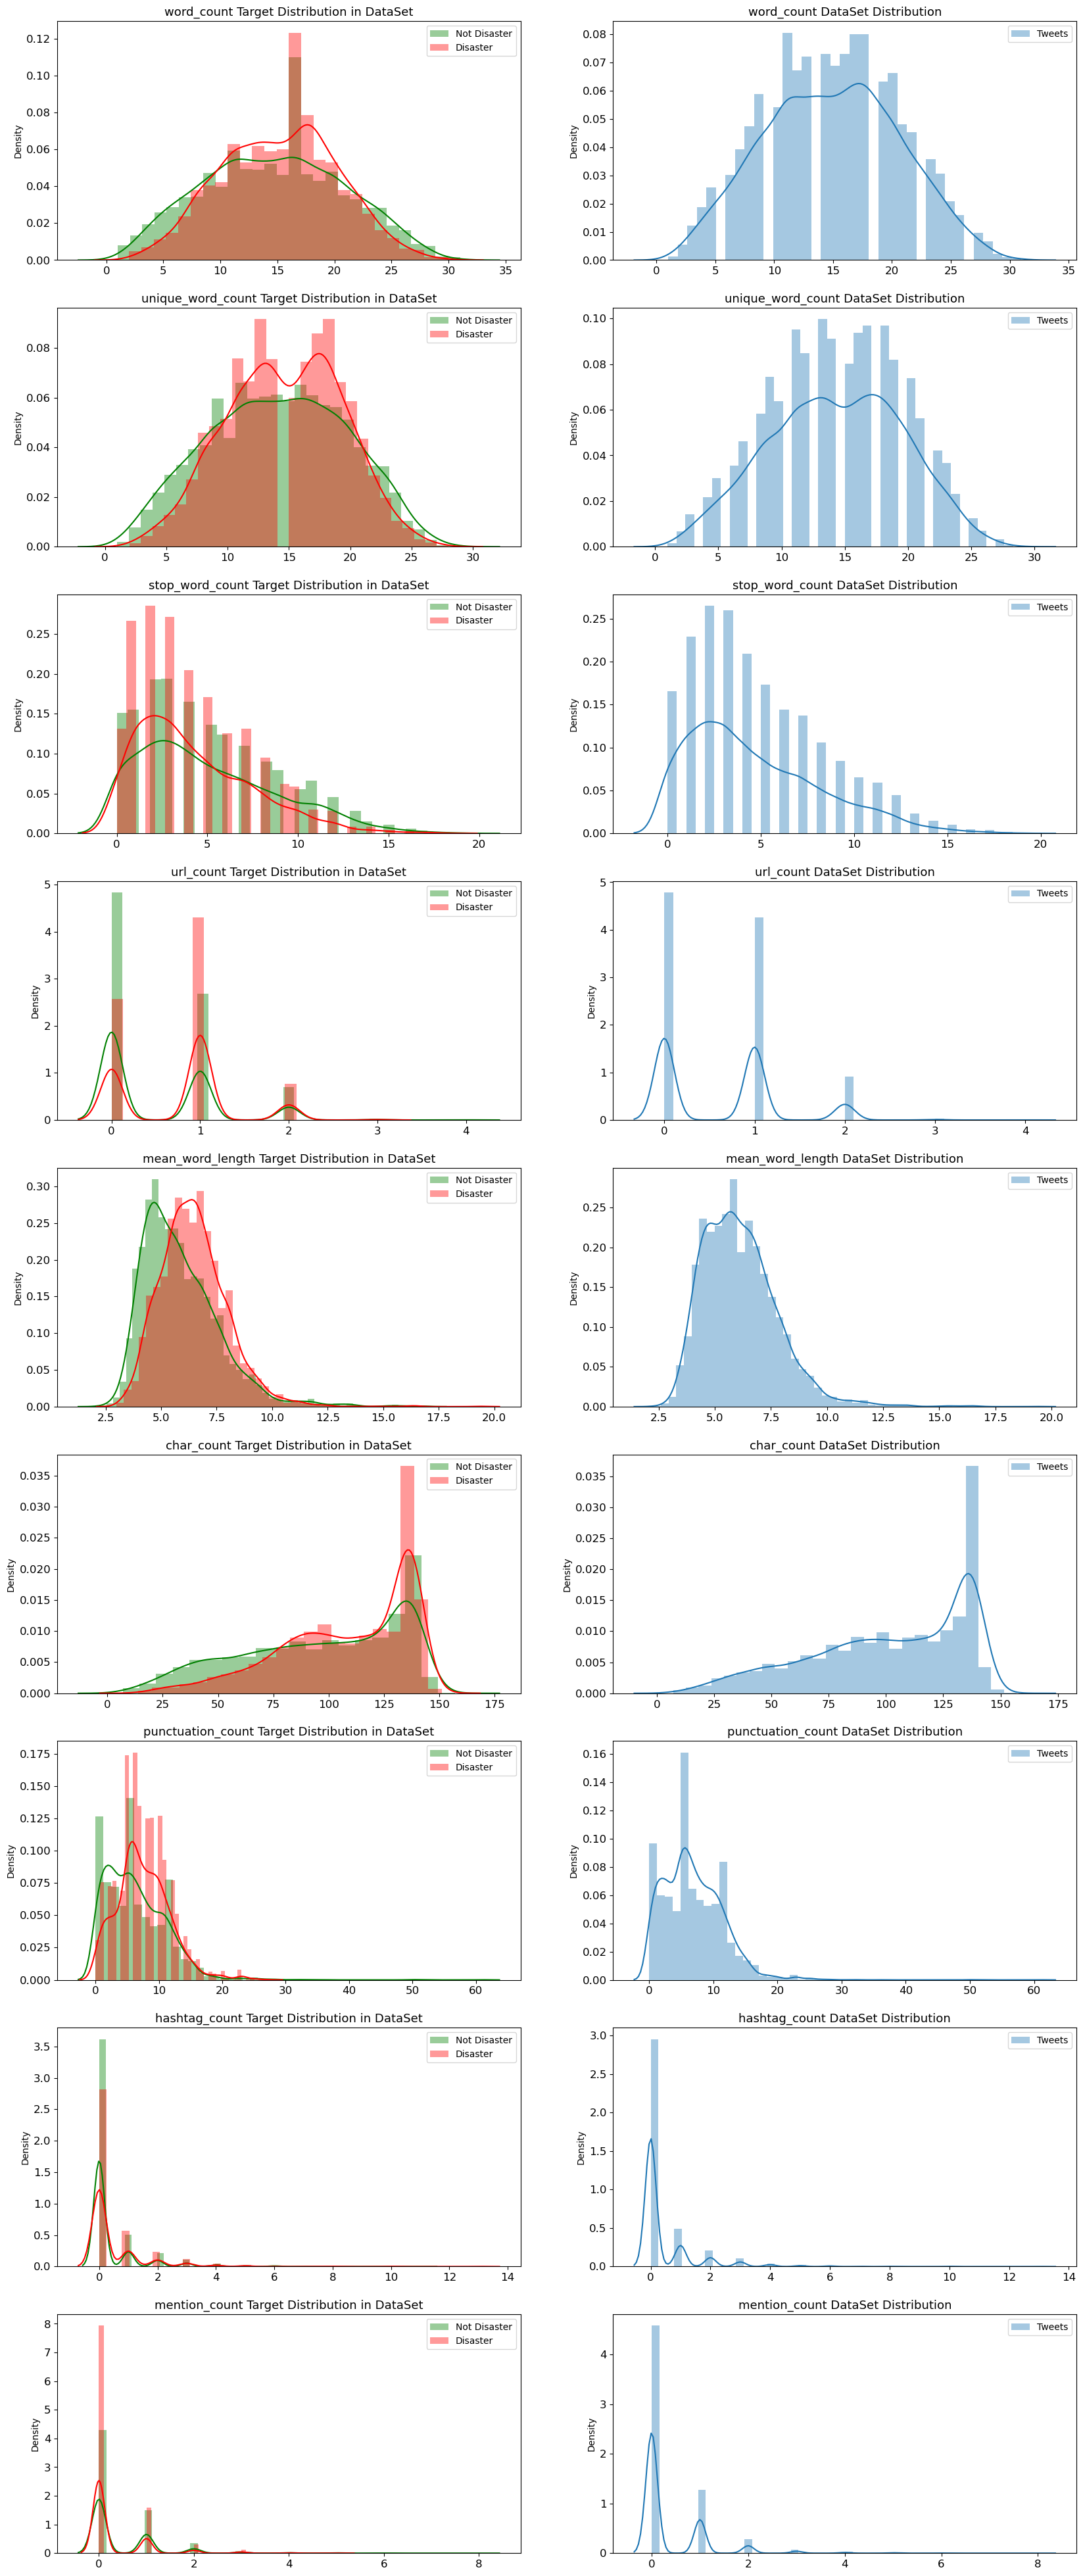

In [18]:
# Plotting the distribution of the new columns

# Define the features to plot
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = df['target'] == 1

# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

# Plot the distribution of the features 
for i, feature in enumerate(METAFEATURES):
    sns.distplot(df.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df[feature], label='Tweets', ax=axes[i][1])

    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()

    axes[i][0].set_title(f'{feature} Target Distribution in DataSet', fontsize=13)
    axes[i][1].set_title(f'{feature} DataSet Distribution', fontsize=13)

plt.show()

In [19]:
# Count of target variable values in the dataset
label_target_count = df.target.value_counts()
label_target_count

target
0    4342
1    3271
Name: count, dtype: int64

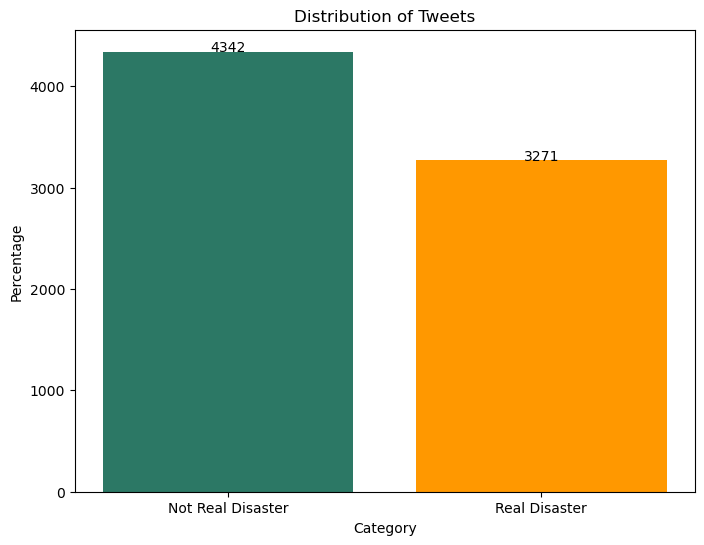

In [20]:
# Create a ling of both the target labels
target_label= ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Define the figure size for plotting
plt.figure(figsize=(8, 6))

# Plot the bar chart
plt.bar(target_label, label_target_count, color=colors)

# Add data labels
for i, v in enumerate(label_target_count):
    plt.text(i, v + 1, str(v), ha='center')

# Add title and labels
plt.title("Distribution of Tweets")
plt.xlabel("Category")
plt.ylabel("Percentage")

# Show the plot
plt.show()

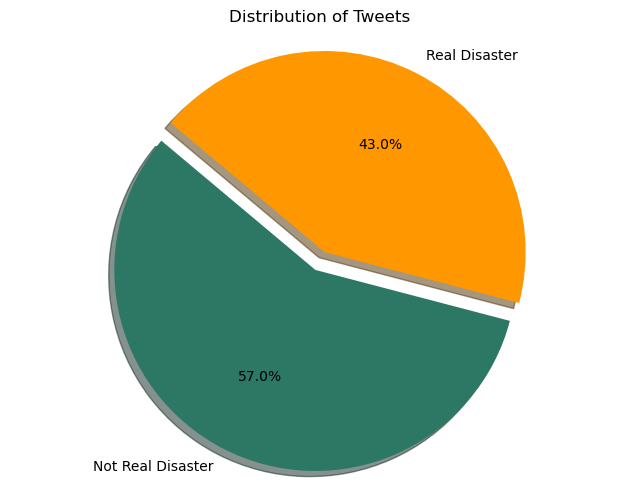

In [21]:
# Plot the distribution of the target variable in the dataset in the pie chart for a better ratio understanding
target_label = ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Explode the Real Disaster slice
explode = (0.1, 0)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_target_count, labels=target_label, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
plt.title("Distribution of Tweets")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

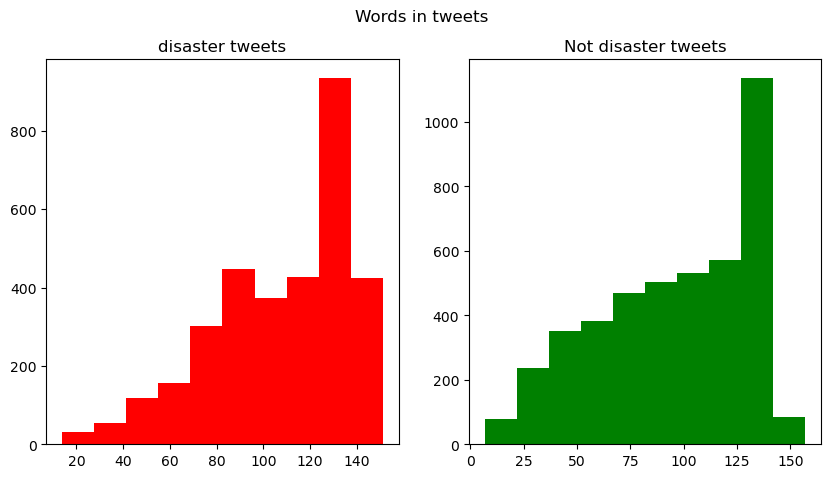

In [22]:
# Plot a histogram for the distribution of words in the tweets

# Define the figure size and axis for plotting
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# Plot the histogram
tweet_len = df[df['target'] == 1]['text'].str.len()
ax1.hist(tweet_len,color = 'red')
ax1.set_title('disaster tweets')

tweet_len = df[df['target'] == 0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()

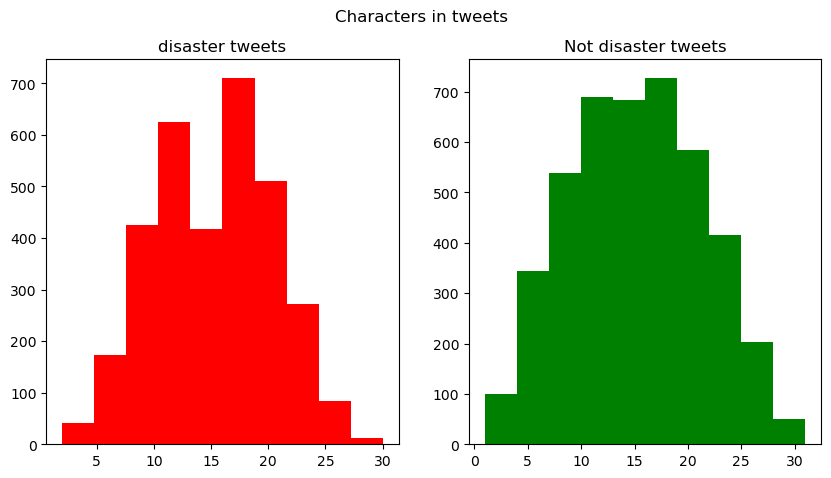

In [23]:
# Plot a histogram for the distribution of characters in the tweets

# Define the figure size and axis for plotting
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# Plot the histogram
tweet_len = df[df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')

tweet_len = df[df['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color = 'green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [24]:
#  Define a function for n-gram analysis
def gram(text,n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [25]:
# Initialize value to plot the top 100 n-gram words
N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df[DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        disaster_unigrams[word] += 1

for tweet in df[~DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key = lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key = lambda x: x[1])[::-1])

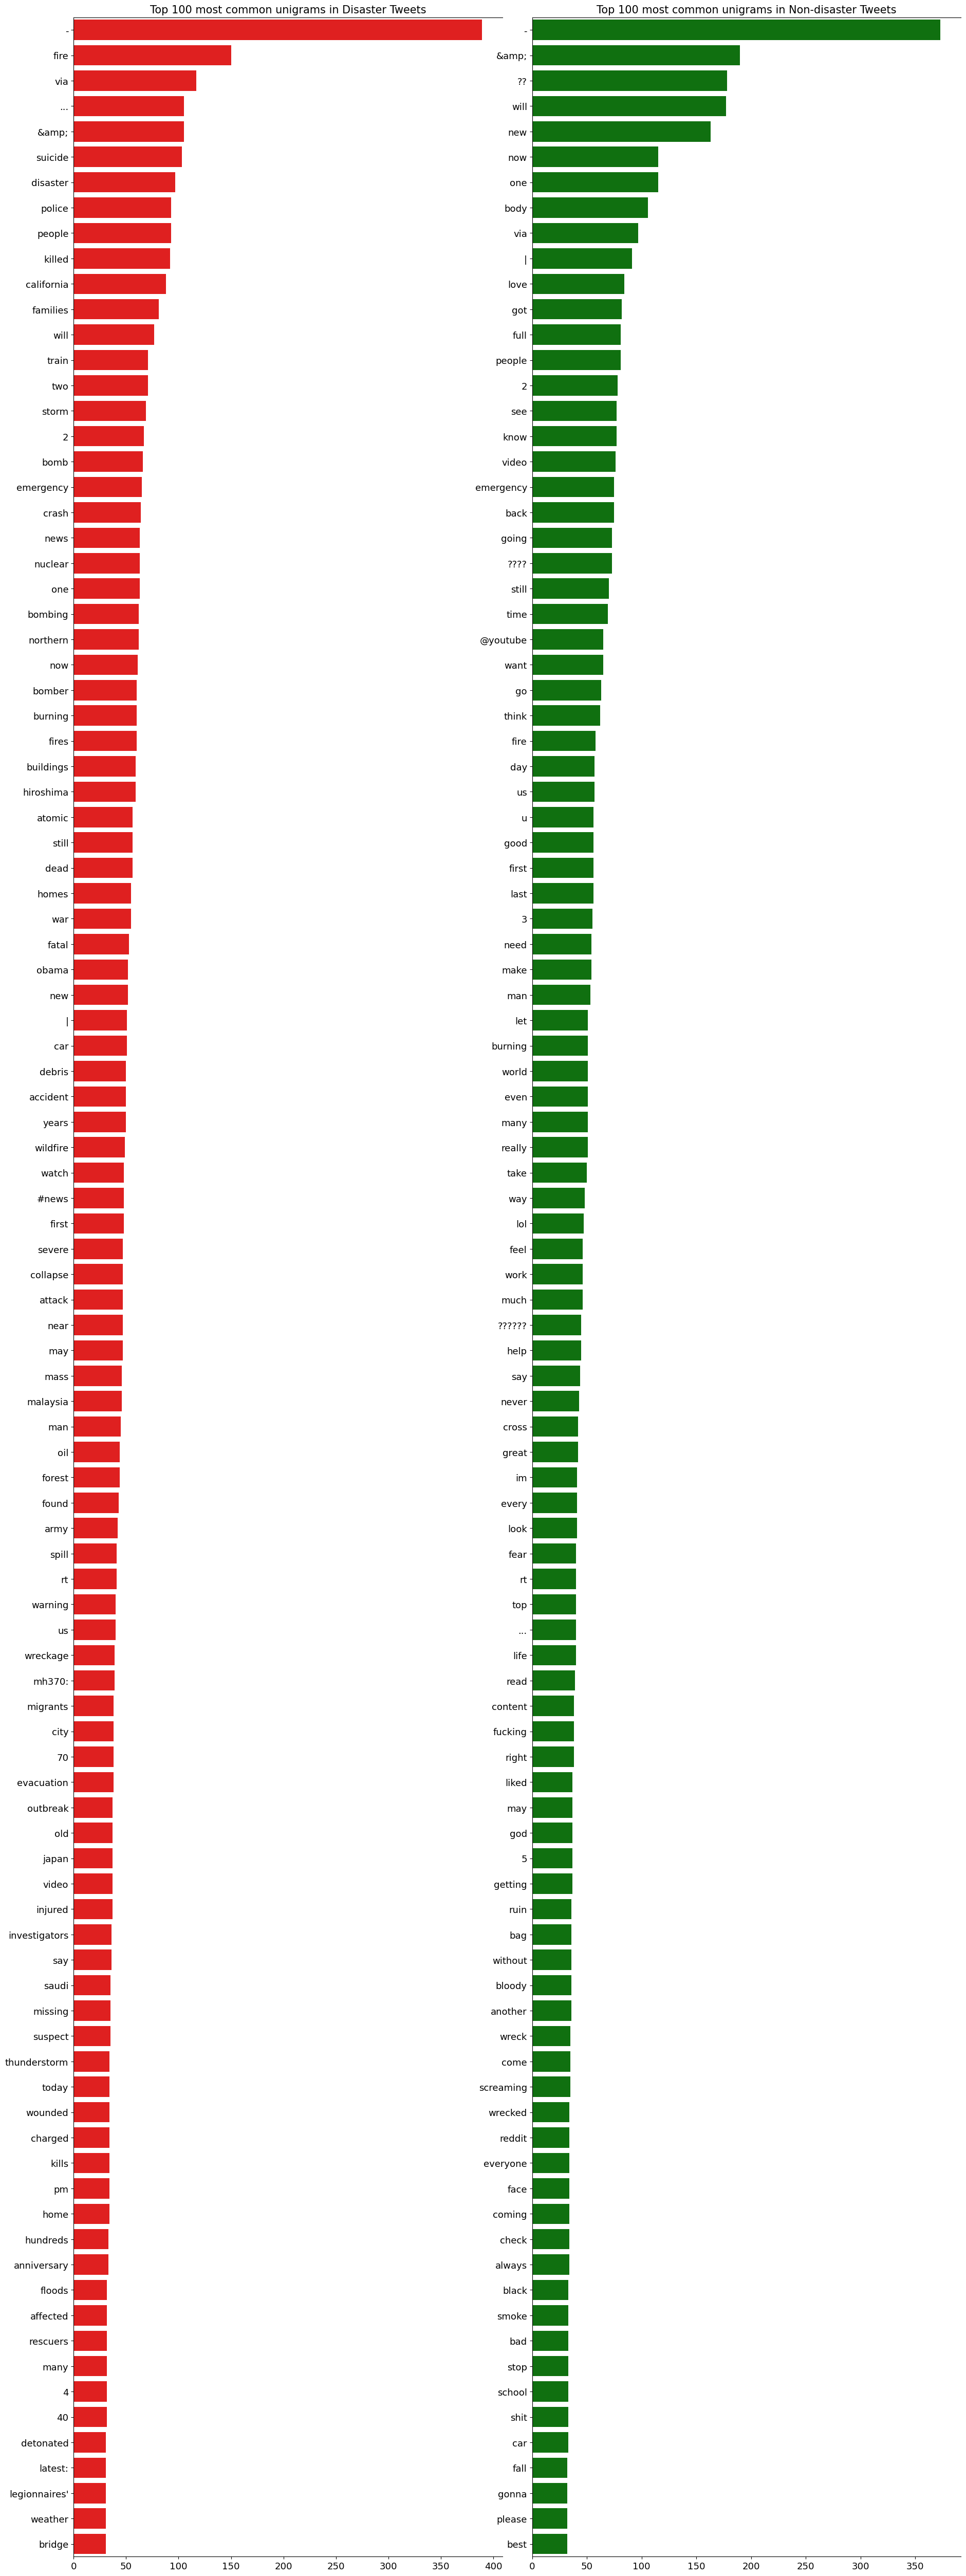

In [26]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common unigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [27]:
# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in df[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

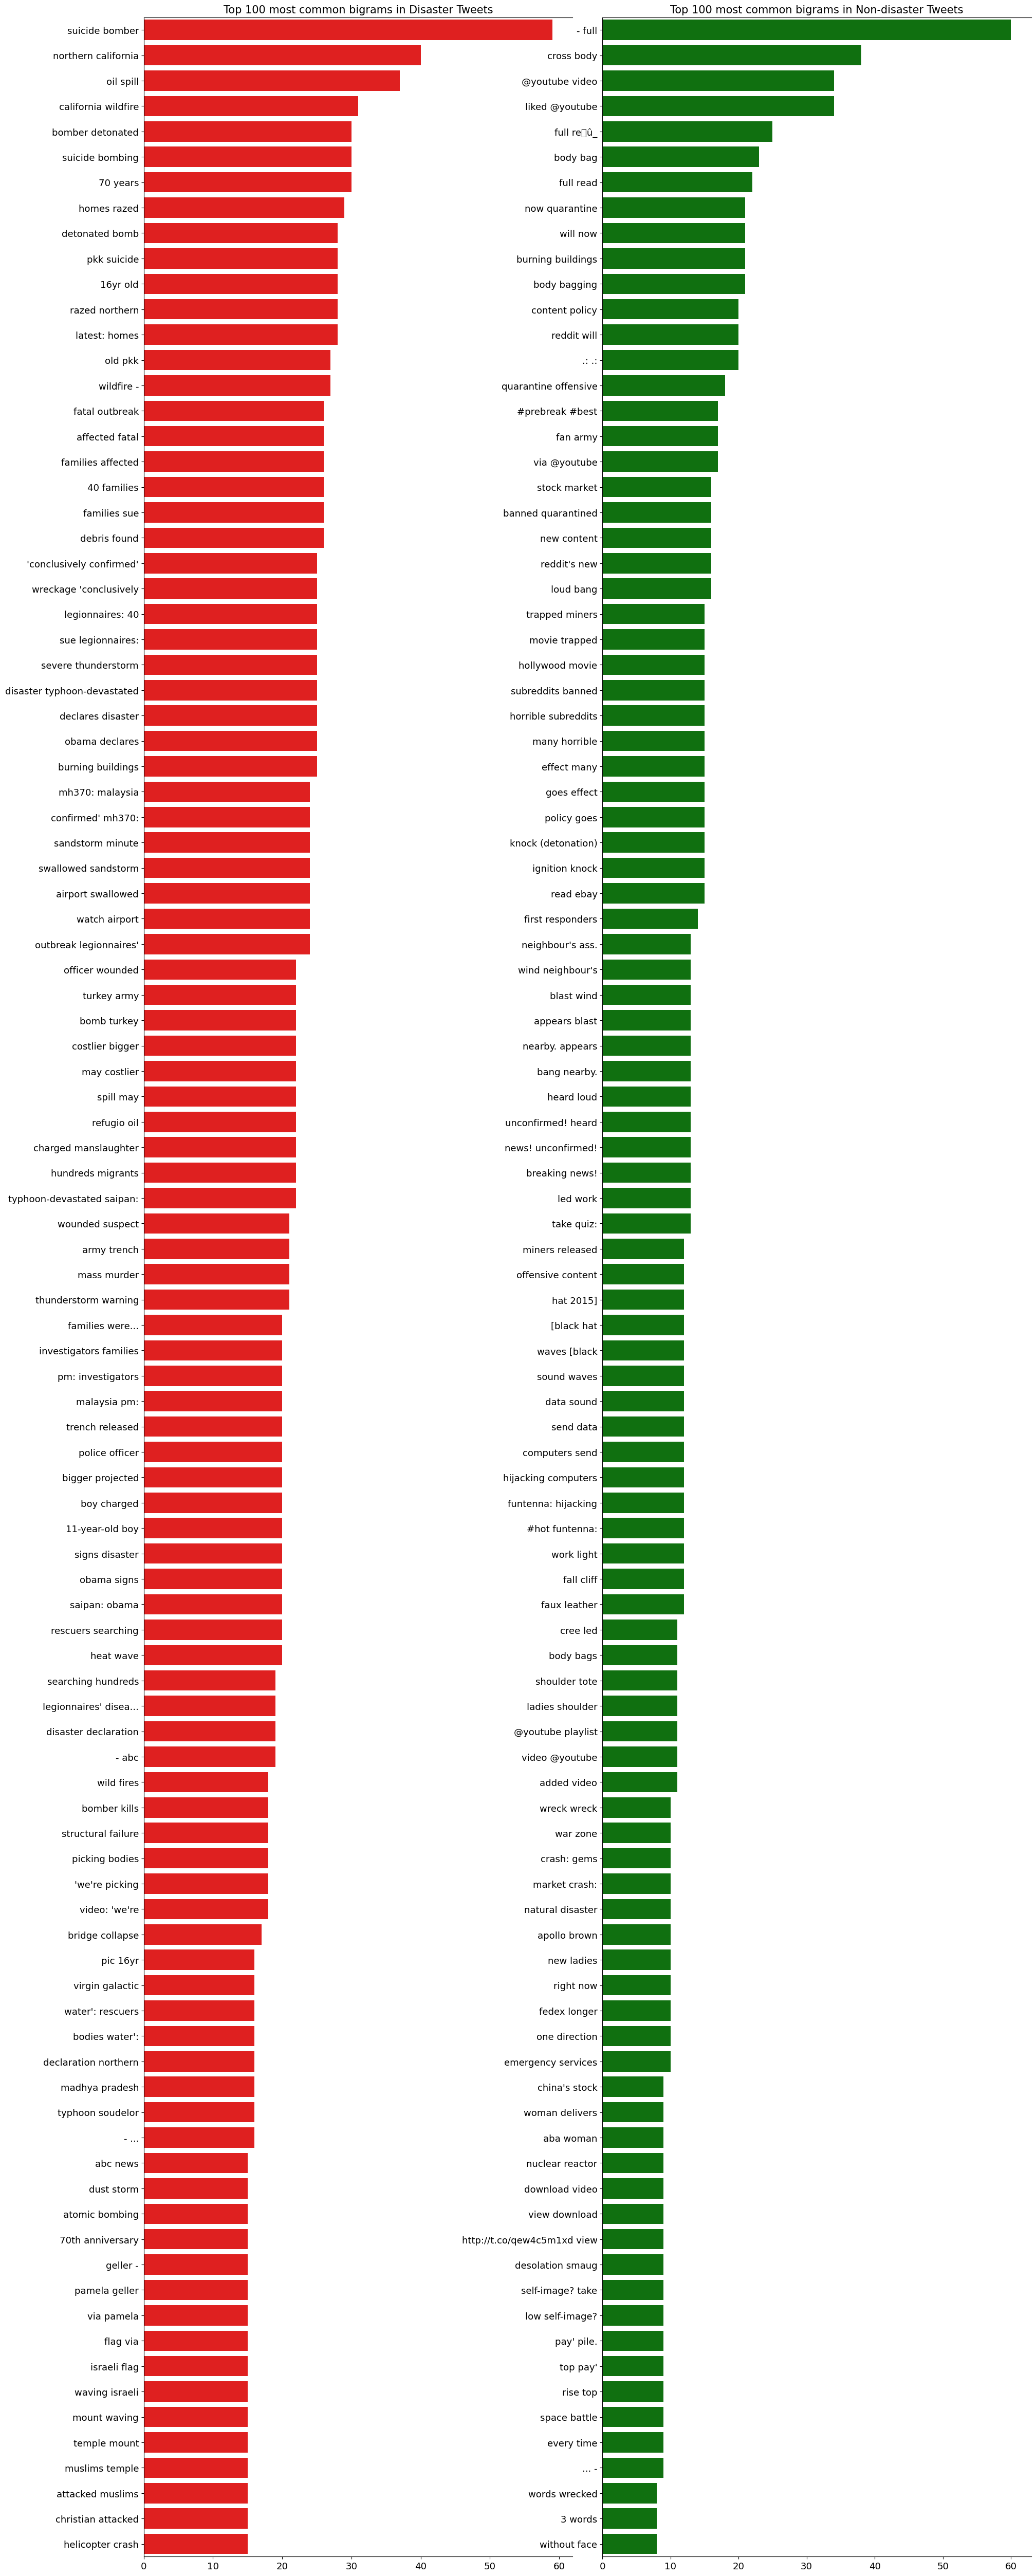

In [28]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common bigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [29]:
# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        disaster_trigrams[word] += 1

for tweet in df[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

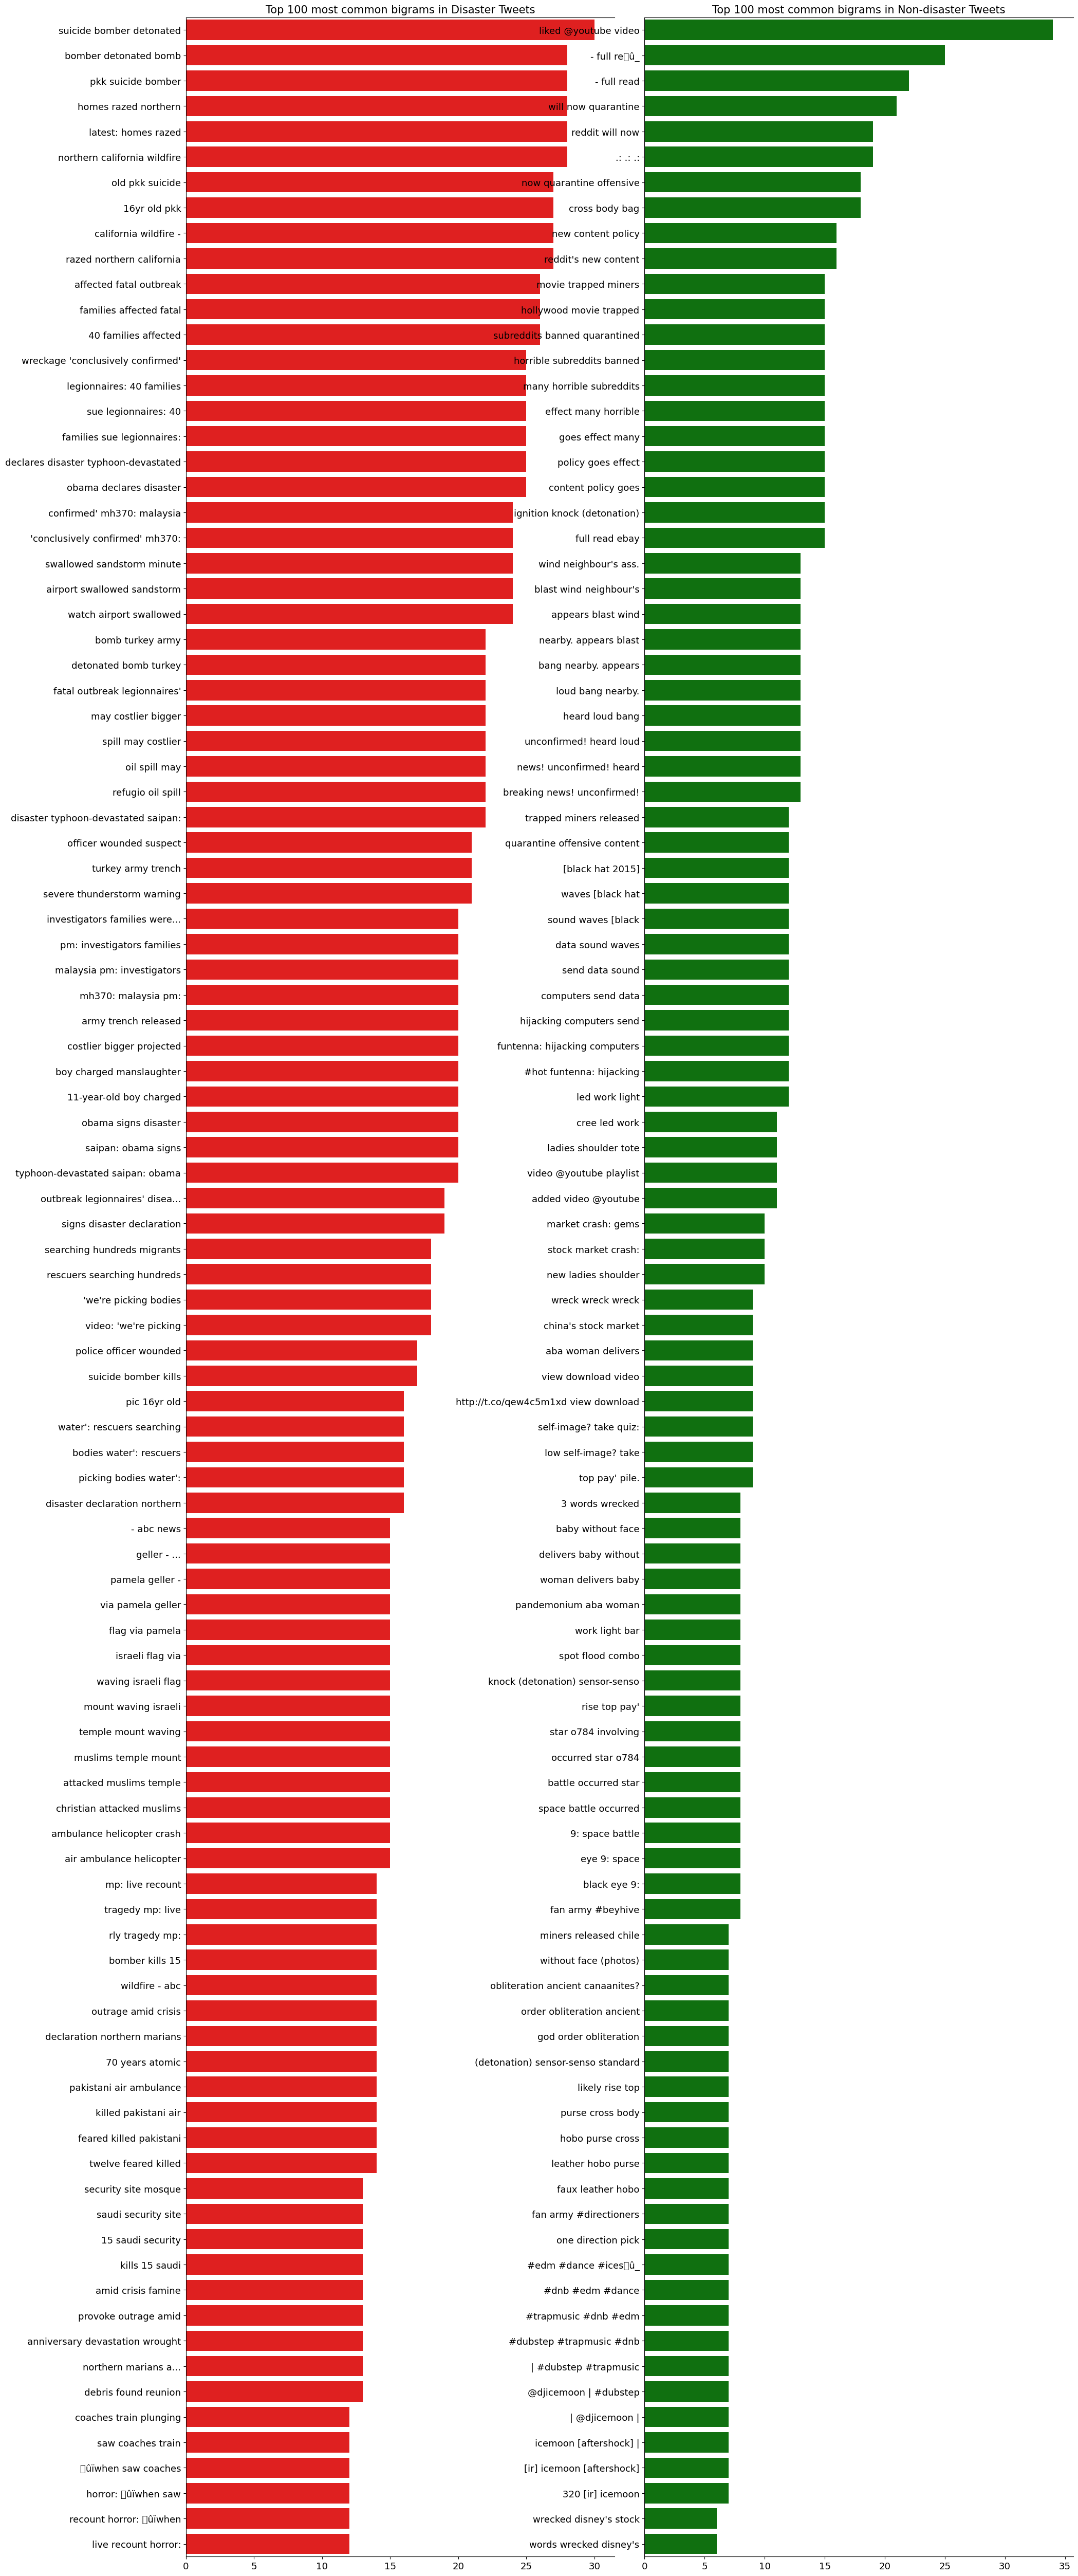

In [30]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common trigrams in disaster and non-disaster tweets
sns.barplot(y = df_disaster_trigrams[0].values[:N], x = df_disaster_trigrams[1].values[:N], ax = axes[0], color='red')
sns.barplot(y = df_nondisaster_trigrams[0].values[:N], x = df_nondisaster_trigrams[1].values[:N], ax = axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [31]:
# Dropping all the useless columns which we just created for the analysis and the target variable from the main dataset because we have already stored it in a variable (tweets_target)
df.drop(columns=['word_count','unique_word_count','stop_word_count','url_count',
        'mean_word_length','char_count','punctuation_count','hashtag_count','mention_count','target'],inplace=True)

In [32]:
# Creating a new column in the dataset by combining all the text columns (keyword, location, text) into a single column, So that we can make embeddings on it and make predictions 
df['complete_text'] = df['keyword'] + ' ' + df['location'] + ' ' + df['text']

In [33]:
# Display the first 3 rows of the dataset after adding the new column complete_text
df.head(3)

,keyword,location,text,complete_text
0,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,no keyword no location Our Deeds are the Reaso...
1,no keyword,no location,Forest fire near La Ronge Sask. Canada,no keyword no location Forest fire near La Ron...
2,no keyword,no location,All residents asked to 'shelter in place' are ...,no keyword no location All residents asked to ...


### Data Cleaning and Embedding Creations

In [34]:
# Create an new instance text_clean of the class X_clean to clean the training data and create a Word2Vec model on the cleaned data.
# The method should take as input the training data and a boolen value train if it is a training data or not, 
# and return a Message when the trainnig is done.
text_clean = X_clean(train = True, training_list = df['complete_text'])

# Call the get_embedding method to train the Word2Vec model
text_clean.get_embedding()

'Training Done'

In [35]:
# Create a new column in the dataset to store the average embeddings of the complete_text column in the dataset
df['embeddings'] = df['complete_text'].apply(lambda x: X_clean(text = x).average_embed())

In [36]:
# Display the first 5 rows of the dataset after adding the new column embeddings
df.head()

,keyword,location,text,complete_text,embeddings
0,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,no keyword no location Our Deeds are the Reaso...,"[0.029804177168342803, -0.21187750043140519, 0..."
1,no keyword,no location,Forest fire near La Ronge Sask. Canada,no keyword no location Forest fire near La Ron...,"[0.03251667774748057, -0.2551473965868354, 0.3..."
2,no keyword,no location,All residents asked to 'shelter in place' are ...,no keyword no location All residents asked to ...,"[0.019812743334720533, -0.16088047623634338, 0..."
3,no keyword,no location,"13,000 people receive #wildfires evacuation or...","no keyword no location 13,000 people receive #...","[0.02953289630305436, -0.24245510001977286, 0...."
4,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,no keyword no location Just got sent this phot...,"[0.025689914060587234, -0.2096068967472423, 0...."


In [37]:
# Showing how embeddings looks like for a single tweet
d= 'body%20bagging Cloud 9 Mopheme and Bigstar Johnson are a problem in this game body bagging niggas #VuzuHustle'
X_clean(text = d,train=False).average_embed()

array([ 0.0181083 , -0.15135917,  0.21064241,  0.10300825,  0.15673889,
       -0.12846703,  0.10732035, -0.05253348, -0.08829491,  0.16498983,
        0.0747251 , -0.06624839,  0.10688627, -0.2142512 ,  0.10268803,
        0.09632019,  0.10524282,  0.07701958, -0.27401501,  0.13049091,
        0.03533775, -0.0634921 , -0.07767955, -0.14624557, -0.08489448,
        0.11405322,  0.04249529,  0.05559188, -0.07451884, -0.062795  ,
        0.01074664,  0.05802995, -0.05271002,  0.07672267, -0.0903828 ,
        0.09663288,  0.23960184, -0.13999219, -0.01100205,  0.05425616,
       -0.05319035,  0.08217799, -0.05711644,  0.122371  ,  0.24937606,
       -0.05448214, -0.01904597, -0.03731989, -0.00732086,  0.02653974,
       -0.01961667,  0.02372108,  0.07862373,  0.23169518, -0.06581565,
        0.02236027, -0.01656372, -0.2289812 ,  0.05319995,  0.1520324 ,
       -0.14578913, -0.00640896, -0.09733649, -0.04376532,  0.18142041,
       -0.01425065,  0.01438875,  0.28553404, -0.0613369 ,  0.02

## Model trainig
### Algorithms we use
* RandomForestClassifier
* LogisticRegressionCV
* KNeighborsClassifier
* DecisionTreeClassifier
* RidgeClassifierCV
* ExtraTreeClassifier
* GradientBoostingClassifier
* XGBClassifier
* AdaBoostClassifier
* BernoulliNB
* CatBoostClassifier

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['embeddings'].tolist(), df_target.tolist(), test_size=0.2, random_state=42)

In [42]:
# For this Project , we are using the following Models and the libraries with respect to those  models are as follow:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from catboost import CatBoostClassifier

# To Store the Accuracy of each model in a dictionary
modal_accuracy_dict = {}

# List of models to test, you can add or remove any classifiers here
model_testing = [RandomForestClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200, random_state=13), 
                 LogisticRegressionCV(max_iter=1000,random_state=13), 
                 KNeighborsClassifier(), 
                 DecisionTreeClassifier(random_state=13),
                 RidgeClassifierCV(),
                 GradientBoostingClassifier(random_state=13),
                 XGBClassifier(random_state = 13),
                 ExtraTreeClassifier(random_state=13),
                 AdaBoostClassifier(random_state=13),
                 BernoulliNB(),
                 CatBoostClassifier(logging_level='Silent', random_state=13)]

# Fit each model one by one to get the accuracy as results
for model in model_testing:
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the model's accuracy on the testing data set
    ypred = model.predict(X_test)
    # Calculate the accuracy of the model and store it in the dictionary
    accuracy = accuracy_score(y_test, ypred)
    modal_accuracy_dict[model.__class__.__name__] = accuracy
    # Save the model in the trained_models folder
    with open('trained_models/'+ model.__class__.__name__+'.'+'pickle', 'wb') as f:
        pickle.dump(model, f)
    # Print the model and its accuracy
    print("model: {}  score {}".format(model, accuracy))

FileNotFoundError: [Errno 2] No such file or directory: 'trained_models/RandomForestClassifier.pickle'